# This code Perform a Singly Gravity Model with Distance as Impedance

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
from folium.plugins import HeatMap, MarkerCluster
import matplotlib.colors as mcolors
import ace_tools_open as tools

## Singly Constrained Gravity Model with Distance

In [2]:
# Load Production and Attraction data
production_attraction = pd.read_csv('prodution_attraction.csv')
production_attraction

,trct,trctname,CNS16,lat,long,tract_number,tract_name,Total Medical Visit
0,21001970100,"9701 (Adair, KY)",0,37.235091,-85.158997,21001970100,"Adair County, Tract 970100",116.400718
1,21001970200,"9702 (Adair, KY)",35,37.172349,-85.337815,21001970200,"Adair County, Tract 970200",130.701292
2,21001970300,"9703 (Adair, KY)",5,37.128164,-85.156588,21001970300,"Adair County, Tract 970300",216.206251
3,21001970401,"9704.01 (Adair, KY)",355,37.052371,-85.328457,21001970401,"Adair County, Tract 970401",301.566243
4,21001970402,"9704.02 (Adair, KY)",220,37.122300,-85.276557,21001970402,"Adair County, Tract 970402",245.354618
...,...,...,...,...,...,...,...,...
1110,21239050106,"501.06 (Woodford, KY)",101,38.021165,-84.687406,21239050106,"Woodford County, Tract 050106",245.115946
1111,21239050107,"501.07 (Woodford, KY)",54,38.044747,-84.687097,21239050107,"Woodford County, Tract 050107",248.863732
1112,21239050200,"502 (Woodford, KY)",26,37.960814,-84.732228,21239050200,"Woodford County, Tract 050200",282.790542
1113,21239050300,"503 (Woodford, KY)",5,38.098915,-84.773211,21239050300,"Woodford County, Tract 050300",126.373998


In [3]:
# Load data (Kentucky Travel Time_Distance Data)
ky_travel_time = pd.read_csv('KY_travel_time_distance.csv')
ky_travel_time

,geoid_origin,origin_x,origin_y,geoid_dest,dest_x,dest_y,travel_distance,travel_time
0,2.123793e+10,-83.588704,37.738887,2.123793e+10,-83.588704,37.738887,0.000000,0.000000
1,2.123793e+10,-83.588704,37.738887,2.103193e+10,-86.731982,37.225166,212.131433,254.830000
2,2.123793e+10,-83.588704,37.738887,2.103193e+10,-86.723313,37.087762,218.796836,262.365000
3,2.123793e+10,-83.588704,37.738887,2.103193e+10,-86.517884,37.236586,206.800490,245.881667
4,2.123793e+10,-83.588704,37.738887,2.103193e+10,-86.848686,37.157033,221.002026,269.431667
...,...,...,...,...,...,...,...,...
1243219,2.119593e+10,-82.380711,37.517216,2.119593e+10,-82.486145,37.621373,23.598183,51.371667
1243220,2.119593e+10,-82.380711,37.517216,2.119593e+10,-82.470858,37.313760,38.993935,55.928333
1243221,2.119593e+10,-82.380711,37.517216,2.119593e+10,-82.562128,37.548172,20.724521,32.423333
1243222,2.119593e+10,-82.380711,37.517216,2.119593e+10,-82.192534,37.562992,22.869686,42.480000


In [4]:
# Load Shapefile
gdf_shp = gpd.read_file('tl_2019_21_tract.shp')
gdf_shp

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,21,237,930200,21237930200,9302,Census Tract 9302,G5020,S,248131879,707264,+37.7406296,-083.5940784,"POLYGON ((-83.70797 37.71646, -83.70204 37.724..."
1,21,031,930300,21031930300,9303,Census Tract 9303,G5020,S,194557718,5686994,+37.2201287,-086.7365307,"POLYGON ((-86.85436 37.25474, -86.85424 37.254..."
2,21,031,930400,21031930400,9304,Census Tract 9304,G5020,S,218455330,1082205,+37.0872907,-086.7250544,"POLYGON ((-86.84134 37.05531, -86.84132 37.055..."
3,21,031,930200,21031930200,9302,Census Tract 9302,G5020,S,248312270,2862420,+37.2416585,-086.5195770,"POLYGON ((-86.66818 37.22558, -86.66821 37.226..."
4,21,031,930500,21031930500,9305,Census Tract 9305,G5020,S,208592384,2662267,+37.1576813,-086.8500520,"POLYGON ((-86.94494 37.07296, -86.94488 37.073..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,21,195,931000,21195931000,9310,Census Tract 9310,G5020,S,70345477,0,+37.3137554,-082.4708692,"POLYGON ((-82.53754 37.26208, -82.53734 37.262..."
1111,21,195,930200,21195930200,9302,Census Tract 9302,G5020,S,129254353,5345,+37.5531372,-082.5485313,"POLYGON ((-82.62441 37.52102, -82.62135 37.526..."
1112,21,195,931600,21195931600,9316,Census Tract 9316,G5020,S,68228358,0,+37.5629802,-082.1925470,"POLYGON ((-82.24536 37.52614, -82.24473 37.527..."
1113,21,195,930400,21195930400,9304,Census Tract 9304,G5020,S,48576134,0,+37.4616900,-082.4810037,"POLYGON ((-82.53365 37.4708, -82.53364 37.4708..."


## Prepare KY Trip-Distance for Gravity Model

In [5]:
# Strip spaces from column names to avoid hidden issues
ky_travel_time.columns = ky_travel_time.columns.str.strip()

In [6]:
# Convert geoid_origin and geoid_dest to whole numbers (integers)
ky_travel_time["geoid_origin"] = ky_travel_time["geoid_origin"].astype("int64")
ky_travel_time["geoid_dest"] = ky_travel_time["geoid_dest"].astype("int64")

In [7]:
ky_travel_time

,geoid_origin,origin_x,origin_y,geoid_dest,dest_x,dest_y,travel_distance,travel_time
0,21237930200,-83.588704,37.738887,21237930200,-83.588704,37.738887,0.000000,0.000000
1,21237930200,-83.588704,37.738887,21031930300,-86.731982,37.225166,212.131433,254.830000
2,21237930200,-83.588704,37.738887,21031930400,-86.723313,37.087762,218.796836,262.365000
3,21237930200,-83.588704,37.738887,21031930200,-86.517884,37.236586,206.800490,245.881667
4,21237930200,-83.588704,37.738887,21031930500,-86.848686,37.157033,221.002026,269.431667
...,...,...,...,...,...,...,...,...
1243219,21195931200,-82.380711,37.517216,21195930100,-82.486145,37.621373,23.598183,51.371667
1243220,21195931200,-82.380711,37.517216,21195931000,-82.470858,37.313760,38.993935,55.928333
1243221,21195931200,-82.380711,37.517216,21195930200,-82.562128,37.548172,20.724521,32.423333
1243222,21195931200,-82.380711,37.517216,21195931600,-82.192534,37.562992,22.869686,42.480000


## Convert KY Distance to a Square Matrix

In [8]:
# Convert `tract_travel_time` to a Square Cost Matrix
distance_matrix = ky_travel_time.pivot(index="geoid_origin", columns="geoid_dest", values="travel_distance")

# Convert index and columns to string for consistency
distance_matrix.index = distance_matrix.index.astype(str)
distance_matrix.columns = distance_matrix.columns.astype(str)

In [9]:
distance_matrix

geoid_dest,21001970100,21001970200,21001970300,21001970401,21001970402,21001970500,21001970600,21003920100,21003920200,21003920300,...,21237930100,21237930200,21239050103,21239050104,21239050105,21239050106,21239050107,21239050200,21239050300,21239050400
geoid_origin,,,,,,,,,,,,,,,,,,,,,
21001970100,0.000000,15.595275,14.729516,20.074689,13.540955,25.454161,26.041545,80.582040,84.688506,77.399493,...,148.943604,138.747375,81.819504,82.296283,79.725540,83.611915,81.835224,76.915816,84.592069,88.676165
21001970200,15.595275,0.000000,16.436489,10.604347,7.138641,15.983757,16.571141,71.111636,75.218102,67.929151,...,149.751948,139.444866,86.506767,86.983546,84.412803,88.299179,86.522487,90.055675,89.279394,93.363428
21001970300,14.729516,16.436489,0.000000,15.912921,8.076479,20.794922,16.652230,76.436862,80.543328,73.254315,...,138.730163,128.423142,90.302733,90.779512,88.208707,92.095145,90.318454,85.399046,93.075298,97.159395
21001970401,20.075373,10.604968,15.989785,0.000000,7.301502,8.991326,13.040563,63.763655,67.870121,60.581108,...,146.220625,135.913542,96.259647,96.736426,94.165683,98.052121,96.275368,99.808555,99.032274,103.116309
21001970402,13.540955,7.138641,8.076479,7.300819,0.000000,12.680291,12.633688,67.703717,71.810183,64.521232,...,145.814433,135.507413,92.793319,93.270098,90.699293,94.585731,92.809040,96.342227,95.565884,99.649981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21239050106,83.376042,88.432587,91.859272,98.184846,94.719140,103.564256,104.151702,144.256652,161.609107,150.900307,...,86.773771,76.577603,5.842395,7.121056,6.905315,0.000000,3.276809,12.786422,9.416842,13.500876
21239050107,80.684318,85.740863,89.167547,95.493121,92.027415,100.872532,101.459977,141.564927,158.917382,148.208582,...,91.600159,81.403930,6.307617,6.784396,4.213653,8.316391,0.000000,10.094759,9.080244,13.164279
21239050200,72.648477,90.270421,81.131768,100.022680,96.556974,105.402090,105.989536,146.094486,163.447003,152.738141,...,95.912424,85.716194,9.180906,11.324705,8.753961,12.628655,10.851964,0.000000,13.620553,17.704587


## Handle zeros in the Distance matrix 

In [10]:
# Function to replace zeros
def replace_zeros_with_half_min(df):
    for index, row in df.iterrows():
        min_value = row[row > 0].min()  # Get minimum value excluding zeros
        if not np.isnan(min_value):  # Ensure there is a valid minimum
            df.loc[index] = row.replace(0, min_value / 2)
    return df

# Apply the transformation
distance_matrix = replace_zeros_with_half_min(distance_matrix)
distance_matrix

geoid_dest,21001970100,21001970200,21001970300,21001970401,21001970402,21001970500,21001970600,21003920100,21003920200,21003920300,...,21237930100,21237930200,21239050103,21239050104,21239050105,21239050106,21239050107,21239050200,21239050300,21239050400
geoid_origin,,,,,,,,,,,,,,,,,,,,,
21001970100,5.257932,15.595275,14.729516,20.074689,13.540955,25.454161,26.041545,80.582040,84.688506,77.399493,...,148.943604,138.747375,81.819504,82.296283,79.725540,83.611915,81.835224,76.915816,84.592069,88.676165
21001970200,15.595275,3.569320,16.436489,10.604347,7.138641,15.983757,16.571141,71.111636,75.218102,67.929151,...,149.751948,139.444866,86.506767,86.983546,84.412803,88.299179,86.522487,90.055675,89.279394,93.363428
21001970300,14.729516,16.436489,3.922975,15.912921,8.076479,20.794922,16.652230,76.436862,80.543328,73.254315,...,138.730163,128.423142,90.302733,90.779512,88.208707,92.095145,90.318454,85.399046,93.075298,97.159395
21001970401,20.075373,10.604968,15.989785,3.650751,7.301502,8.991326,13.040563,63.763655,67.870121,60.581108,...,146.220625,135.913542,96.259647,96.736426,94.165683,98.052121,96.275368,99.808555,99.032274,103.116309
21001970402,13.540955,7.138641,8.076479,7.300819,3.569320,12.680291,12.633688,67.703717,71.810183,64.521232,...,145.814433,135.507413,92.793319,93.270098,90.699293,94.585731,92.809040,96.342227,95.565884,99.649981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21239050106,83.376042,88.432587,91.859272,98.184846,94.719140,103.564256,104.151702,144.256652,161.609107,150.900307,...,86.773771,76.577603,5.842395,7.121056,6.905315,1.638405,3.276809,12.786422,9.416842,13.500876
21239050107,80.684318,85.740863,89.167547,95.493121,92.027415,100.872532,101.459977,141.564927,158.917382,148.208582,...,91.600159,81.403930,6.307617,6.784396,4.213653,8.316391,2.106826,10.094759,9.080244,13.164279
21239050200,72.648477,90.270421,81.131768,100.022680,96.556974,105.402090,105.989536,146.094486,163.447003,152.738141,...,95.912424,85.716194,9.180906,11.324705,8.753961,12.628655,10.851964,4.376981,13.620553,17.704587


## Define Common Zones for the Model

In [11]:
# Align Distance Matrix with Production Attraction Data
production_attraction["tract_number"] = production_attraction["tract_number"].astype(str).str.strip()

# Set zones
common_zones = production_attraction["tract_number"]

## Convert to numpy arrays for Gravity Model

In [12]:
# Convert to numpy arrays for Gravity Model
O = production_attraction["Total Medical Visit"].values
D = production_attraction["CNS16"].values
distance_array = distance_matrix.values

## Apply Power Function Deterrence

In [13]:
# Apply Power Function Deterrence
def deterrence_function(distance, beta):
    """
    Computes the deterrence function using a power function.

    Parameters:
    - cost_matrix (array): Distance Time matrix.
    - beta (float): Impedance parameter.

    Returns:
    - deterrence_matrix (array): Transformed deterrence matrix.
    """
    
    distance_adjusted = np.where(distance < 2, distance*1.43, distance)  
    impedance = np.power(distance_adjusted, beta)
    return impedance

## Apply deterrence function with β = 3.07

In [14]:
# Apply deterrence function with β = 3.07
beta = -3.07
deterrence_matrix = deterrence_function(distance_array, beta)

In [15]:
distance_array

array([[ 5.25793182, 15.59527508, 14.72951645, ..., 76.91581642,
        84.5920688 , 88.67616538],
       [15.59527508,  3.56932034, 16.43648949, ..., 90.055675  ,
        89.27939404, 93.36342849],
       [14.72951645, 16.43648949,  3.92297464, ..., 85.39904557,
        93.07529795, 97.15939453],
       ...,
       [72.64847702, 90.27042141, 81.1317683 , ...,  4.37698063,
        13.62055252, 17.70458697],
       [83.78714256, 88.84368747, 92.27030957, ..., 13.21572819,
         1.79700995,  9.97390235],
       [88.26705357, 93.32359849, 96.75028272, ..., 17.69563921,
        10.32926541,  3.7001193 ]])

In [16]:
deterrence_matrix

array([[6.12488730e-03, 2.17526097e-04, 2.59215721e-04, ...,
        1.62155596e-06, 1.21087130e-06, 1.04769001e-06],
       [2.17526097e-04, 2.01169637e-02, 1.85125467e-04, ...,
        9.99196644e-07, 1.02610951e-06, 8.94452434e-07],
       [2.59215721e-04, 1.85125467e-04, 1.50522151e-02, ...,
        1.17608643e-06, 9.02980318e-07, 7.91446686e-07],
       ...,
       [1.93212225e-06, 9.91917169e-07, 1.37652407e-06, ...,
        1.07545911e-02, 3.29626556e-04, 1.47358976e-04],
       [1.24693968e-06, 1.04163703e-06, 9.27384277e-07, ...,
        3.61618241e-04, 5.51630642e-02, 8.57993716e-04],
       [1.06266948e-06, 8.95624916e-07, 8.01765962e-07, ...,
        1.47587847e-04, 7.70560653e-04, 1.80126544e-02]])

## Build Gravity Model

In [17]:
# Singly Constrained Gravity Model (Production-Constrained)
def gravity_model_single_constrained(O, D, deterrence_matrix, error_threshold=0.01, improvement_threshold=1e-4, max_iterations=100):
    """
    Implements a singly constrained Gravity Model for trip distribution (Production-Constrained).
    
    Parameters:
    - O (array): Origin trip productions.
    - D (array): Destination trip attractions.
    - deterrence_matrix (array): Deterrence function values.
    - error_threshold (float): Convergence criterion for total error.
    - improvement_threshold (float): Minimum improvement required to continue.
    - max_iterations (int): Maximum iterations allowed.

    Returns:
    - Final OD matrix (DataFrame).
    """

    # Normalize O and D to ensure balance on productions
    sum_O = np.sum(O)
    
    if sum_O == 0:
        raise ValueError("Origin (O) matrix must have a non-zero sum.")

    n = len(O)  # Number of zones

    # Initialize balancing factors Ai (for O) and Tij matrix
    Ai = np.ones(n)  # Ai balancing factor, initially set to 1
    Tij = np.zeros((n, n))  # Initialize trips matrix

    previous_error = np.inf  # Initialize previous error
    iteration_count = 0  # Count iterations

    while iteration_count < max_iterations:
        iteration_count += 1  

        # Update Ai balancing factors using vectorized operations
        denominator_Ai = np.sum(D * deterrence_matrix, axis=1)
        Ai = np.where(denominator_Ai > 1e-9, 1 / denominator_Ai, 1e-9)

        # Compute new Tij matrix
        Tij = np.outer(Ai * O, D) * deterrence_matrix

        # Compute row (production) error
        error = np.sum(np.abs(O - np.sum(Tij, axis=1))) / sum_O

        # Compute improvement
        error_change = abs(previous_error - error)

        # Check stopping conditions
        if error < error_threshold:
            stop_reason = "Error threshold met"
            break
        elif error_change < improvement_threshold:
            stop_reason = "Slow improvement"
            break

        previous_error = error  

    else:  # If loop completes without breaking
        stop_reason = "Maximum iterations reached"

    # Format results into a DataFrame
    final_matrix = pd.DataFrame(
        Tij, 
        columns=common_zones, 
        index=common_zones
    )

    # Add total row and column
    final_matrix["Production"] = final_matrix.sum(axis=1)  # Ensures rows sum to O
    final_matrix.loc["Attraction"] = final_matrix.sum(axis=0)  # Optional: Sum of columns

    # Print results
    print(f"Number of Iterations: {iteration_count}")
    print(f"Stopping Condition: {stop_reason}")
    print(f"Final Error: {error * 100:.3f}%")

    return final_matrix


In [18]:
# Run the Gravity Model
final_singly_matrix = gravity_model_single_constrained(O, D, deterrence_matrix)

Number of Iterations: 100
Stopping Condition: Maximum iterations reached
Final Error: nan%


In [19]:
final_singly_matrix

tract_number,21001970100,21001970200,21001970300,21001970401,21001970402,21001970500,21001970600,21003920100,21003920200,21003920300,...,21237930200,21239050103,21239050104,21239050105,21239050106,21239050107,21239050200,21239050300,21239050400,Production
tract_number,,,,,,,,,,,,,,,,,,,,,
21001970100,0.0,0.978029,0.166496,4.569502,9.484880,0.012420,0.005790,0.000181,0.000465,0.073970,...,0.009058,0.007409,0.047901,0.000746,0.016283,0.009299,0.005416,0.000778,0.007941,116.400718
21001970200,0.0,40.445247,0.053171,14.495383,30.273319,0.023172,0.010371,0.000119,0.000299,0.049378,...,0.003988,0.002792,0.018070,0.000280,0.006158,0.003505,0.001492,0.000295,0.003031,130.701292
21001970300,0.0,0.841297,9.772053,9.424787,46.845338,0.023352,0.023094,0.000215,0.000548,0.088529,...,0.011608,0.005532,0.035824,0.000553,0.012233,0.006943,0.003970,0.000586,0.006063,216.206251
21001970401,0.0,0.965415,0.039096,258.627436,19.085645,0.091570,0.014622,0.000112,0.000277,0.047413,...,0.002916,0.001359,0.008810,0.000135,0.003017,0.001706,0.000735,0.000145,0.001510,301.566243
21001970402,0.0,3.492205,0.341531,33.060460,184.338649,0.034202,0.017296,0.000100,0.000250,0.041933,...,0.003158,0.001632,0.010576,0.000163,0.003615,0.002049,0.000880,0.000173,0.001800,245.354618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21239050107,0.0,0.000680,0.000086,0.004953,0.003438,0.000024,0.000012,0.000004,0.000009,0.001310,...,0.006059,2.517949,13.249879,0.808207,2.530965,91.625921,0.359388,0.095670,0.360967,248.863732
21239050200,0.0,0.001871,0.000371,0.013852,0.009566,0.000066,0.000033,0.000012,0.000026,0.003851,...,0.016672,2.564541,8.861839,0.276116,2.263367,1.927450,15.071871,0.088837,0.468628,282.790542
21239050300,0.0,0.000300,0.000038,0.002213,0.001531,0.000011,0.000005,0.000002,0.000004,0.000606,...,0.002907,0.989578,45.931234,0.102187,0.966166,1.479936,0.077478,2.272857,0.417148,126.373998


In [20]:
production_attraction

,trct,trctname,CNS16,lat,long,tract_number,tract_name,Total Medical Visit
0,21001970100,"9701 (Adair, KY)",0,37.235091,-85.158997,21001970100,"Adair County, Tract 970100",116.400718
1,21001970200,"9702 (Adair, KY)",35,37.172349,-85.337815,21001970200,"Adair County, Tract 970200",130.701292
2,21001970300,"9703 (Adair, KY)",5,37.128164,-85.156588,21001970300,"Adair County, Tract 970300",216.206251
3,21001970401,"9704.01 (Adair, KY)",355,37.052371,-85.328457,21001970401,"Adair County, Tract 970401",301.566243
4,21001970402,"9704.02 (Adair, KY)",220,37.122300,-85.276557,21001970402,"Adair County, Tract 970402",245.354618
...,...,...,...,...,...,...,...,...
1110,21239050106,"501.06 (Woodford, KY)",101,38.021165,-84.687406,21239050106,"Woodford County, Tract 050106",245.115946
1111,21239050107,"501.07 (Woodford, KY)",54,38.044747,-84.687097,21239050107,"Woodford County, Tract 050107",248.863732
1112,21239050200,"502 (Woodford, KY)",26,37.960814,-84.732228,21239050200,"Woodford County, Tract 050200",282.790542
1113,21239050300,"503 (Woodford, KY)",5,38.098915,-84.773211,21239050300,"Woodford County, Tract 050300",126.373998


In [21]:
# Display Results
tools.display_dataframe_to_user(name="Final OD Matrix", dataframe=final_singly_matrix)

Final OD Matrix


## Create the Distance bins

In [22]:
# Drop the last column (Production) and the last row (Attraction) from the OD Matrix
Trip_Matrix = final_singly_matrix.iloc[:-1, :-1]

Trip_Matrix

tract_number,21001970100,21001970200,21001970300,21001970401,21001970402,21001970500,21001970600,21003920100,21003920200,21003920300,...,21237930100,21237930200,21239050103,21239050104,21239050105,21239050106,21239050107,21239050200,21239050300,21239050400
tract_number,,,,,,,,,,,,,,,,,,,,,
21001970100,0.0,0.978029,0.166496,4.569502,9.484880,0.012420,0.005790,0.000181,0.000465,0.073970,...,0.000904,0.009058,0.007409,0.047901,0.000746,0.016283,0.009299,0.005416,0.000778,0.007941
21001970200,0.0,40.445247,0.053171,14.495383,30.273319,0.023172,0.010371,0.000119,0.000299,0.049378,...,0.000398,0.003988,0.002792,0.018070,0.000280,0.006158,0.003505,0.001492,0.000295,0.003031
21001970300,0.0,0.841297,9.772053,9.424787,46.845338,0.023352,0.023094,0.000215,0.000548,0.088529,...,0.001136,0.011608,0.005532,0.035824,0.000553,0.012233,0.006943,0.003970,0.000586,0.006063
21001970401,0.0,0.965415,0.039096,258.627436,19.085645,0.091570,0.014622,0.000112,0.000277,0.047413,...,0.000289,0.002916,0.001359,0.008810,0.000135,0.003017,0.001706,0.000735,0.000145,0.001510
21001970402,0.0,3.492205,0.341531,33.060460,184.338649,0.034202,0.017296,0.000100,0.000250,0.041933,...,0.000313,0.003158,0.001632,0.010576,0.000163,0.003615,0.002049,0.000880,0.000173,0.001800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21239050106,0.0,0.000279,0.000035,0.002052,0.001420,0.000010,0.000005,0.000002,0.000004,0.000559,...,0.000279,0.003297,1.437026,5.151166,0.080020,55.795251,10.650970,0.078466,0.038593,0.150685
21239050107,0.0,0.000680,0.000086,0.004953,0.003438,0.000024,0.000012,0.000004,0.000009,0.001310,...,0.000523,0.006059,2.517949,13.249879,0.808207,2.530965,91.625921,0.359388,0.095670,0.360967
21239050200,0.0,0.001871,0.000371,0.013852,0.009566,0.000066,0.000033,0.000012,0.000026,0.003851,...,0.001465,0.016672,2.564541,8.861839,0.276116,2.263367,1.927450,15.071871,0.088837,0.468628


In [23]:
# Save file as a csv
save_file = Trip_Matrix.to_csv('Distance_OD_matrix.csv', index=True)

In [24]:
distance_matrix

geoid_dest,21001970100,21001970200,21001970300,21001970401,21001970402,21001970500,21001970600,21003920100,21003920200,21003920300,...,21237930100,21237930200,21239050103,21239050104,21239050105,21239050106,21239050107,21239050200,21239050300,21239050400
geoid_origin,,,,,,,,,,,,,,,,,,,,,
21001970100,5.257932,15.595275,14.729516,20.074689,13.540955,25.454161,26.041545,80.582040,84.688506,77.399493,...,148.943604,138.747375,81.819504,82.296283,79.725540,83.611915,81.835224,76.915816,84.592069,88.676165
21001970200,15.595275,3.569320,16.436489,10.604347,7.138641,15.983757,16.571141,71.111636,75.218102,67.929151,...,149.751948,139.444866,86.506767,86.983546,84.412803,88.299179,86.522487,90.055675,89.279394,93.363428
21001970300,14.729516,16.436489,3.922975,15.912921,8.076479,20.794922,16.652230,76.436862,80.543328,73.254315,...,138.730163,128.423142,90.302733,90.779512,88.208707,92.095145,90.318454,85.399046,93.075298,97.159395
21001970401,20.075373,10.604968,15.989785,3.650751,7.301502,8.991326,13.040563,63.763655,67.870121,60.581108,...,146.220625,135.913542,96.259647,96.736426,94.165683,98.052121,96.275368,99.808555,99.032274,103.116309
21001970402,13.540955,7.138641,8.076479,7.300819,3.569320,12.680291,12.633688,67.703717,71.810183,64.521232,...,145.814433,135.507413,92.793319,93.270098,90.699293,94.585731,92.809040,96.342227,95.565884,99.649981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21239050106,83.376042,88.432587,91.859272,98.184846,94.719140,103.564256,104.151702,144.256652,161.609107,150.900307,...,86.773771,76.577603,5.842395,7.121056,6.905315,1.638405,3.276809,12.786422,9.416842,13.500876
21239050107,80.684318,85.740863,89.167547,95.493121,92.027415,100.872532,101.459977,141.564927,158.917382,148.208582,...,91.600159,81.403930,6.307617,6.784396,4.213653,8.316391,2.106826,10.094759,9.080244,13.164279
21239050200,72.648477,90.270421,81.131768,100.022680,96.556974,105.402090,105.989536,146.094486,163.447003,152.738141,...,95.912424,85.716194,9.180906,11.324705,8.753961,12.628655,10.851964,4.376981,13.620553,17.704587


## Create Distance Bin

In [31]:
# Define time bins 
distance_bins = list(range(0, 52, 2))

bin_labels = [f"{distance_bins[i]}-{distance_bins[i+1]}" for i in range(len(distance_bins)-1)]

# Create a DataFrame to store results
trip_sums = {label: 0 for label in bin_labels}

# Process each bin
for i in range(len(distance_bins) - 1):
    bin_min, bin_max = distance_bins[i], distance_bins[i+1]
    
    # Find indices where time values fall in the bin range
    mask = (distance_matrix >= bin_min) & (distance_matrix < bin_max)
    
    # Extract corresponding trip values
    total_trips = Trip_Matrix[mask].sum().sum()
    
    # Store the result
    trip_sums[bin_labels[i]] = total_trips

# Convert results to a DataFrame
distance_df = pd.DataFrame(list(trip_sums.items()), columns=['Distance Bin', 'Total Trips'])

distance_df


,Distance Bin,Total Trips
0,0-2,62649.052773
1,2-4,58853.242032
2,4-6,36434.878646
3,6-8,20948.277545
4,8-10,14793.780385
5,10-12,11138.244920
6,12-14,9748.167002
7,14-16,8287.766673
8,16-18,5648.895532
9,18-20,4773.723791


In [32]:
# Adding Cumulative Sum Column
distance_df["Cumulative Total Trips"] = distance_df["Total Trips"].cumsum()

# Calculating Total Cumulative Sum
total_cumulative_sum = distance_df["Cumulative Total Trips"].iloc[-1] 

# Adding Trip Rate Column
distance_df["Trip Rate (%)"] = (distance_df["Total Trips"] / total_cumulative_sum) * 100

distance_df

,Distance Bin,Total Trips,Cumulative Total Trips,Trip Rate (%)
0,0-2,62649.052773,62649.052773,23.914944
1,2-4,58853.242032,121502.294805,22.465974
2,4-6,36434.878646,157937.173451,13.908240
3,6-8,20948.277545,178885.450995,7.996560
4,8-10,14793.780385,193679.231380,5.647211
5,10-12,11138.244920,204817.476300,4.251788
6,12-14,9748.167002,214565.643302,3.721155
7,14-16,8287.766673,222853.409975,3.163679
8,16-18,5648.895532,228502.305507,2.156346
9,18-20,4773.723791,233276.029298,1.822268


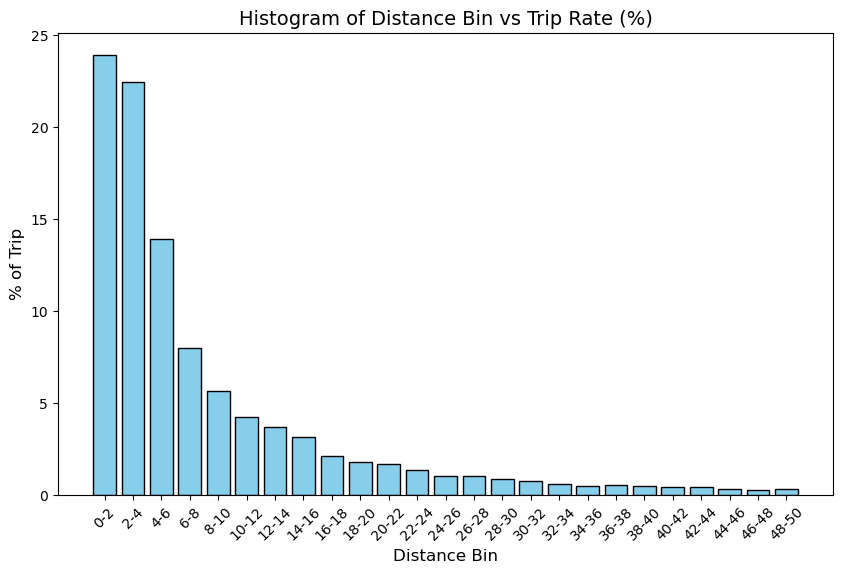

In [34]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(distance_df["Distance Bin"], distance_df["Trip Rate (%)"], color='skyblue', edgecolor='black')

# Labels and title
plt.xlabel("Distance Bin", fontsize=12)
plt.ylabel("% of Trip", fontsize=12)
plt.title("Histogram of Distance Bin vs Trip Rate (%)", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


## Average Distance

In [28]:
# Calculate midpoints of each time bin
distance_df["Midpoint"] = distance_df["Distance Bin"].apply(lambda x: np.mean([int(i) for i in x.split('-')]))

# Compute weighted average travel time
average_distance = (distance_df["Midpoint"] * distance_df["Total Trips"]).sum() / distance_df["Total Trips"].sum()

print(f"Average Distance: {average_distance:.2f} miles")


Average Distance: 9.87 miles


## Compare Observed and Predicted

In [28]:
# Load data (NHTS Data)
nhts_distance_bin = pd.read_csv('NHTS_Distance_bin.csv')
nhts_distance_bin

,Distance Bin,Total Medical Visits,Cumulative Total Medical Visits,Visit Rate (%),Midpoint
0,0-2,3362,3362,20.229857,1.0
1,2-4,3053,6415,18.370540,3.0
2,4-6,2205,8620,13.267946,5.0
3,6-8,1560,10180,9.386846,7.0
4,8-10,1234,11414,7.425236,9.0
5,10-12,898,12312,5.403454,11.0
6,12-14,659,12971,3.965341,13.0
7,14-16,574,13545,3.453878,15.0
8,16-18,509,14054,3.062759,17.0
9,18-20,429,14483,2.581383,19.0


In [29]:
distance_df

,Distance Bin,Total Trips,Cumulative Total Trips,Trip Rate (%)
0,0-2,62649.052773,62649.052773,23.197952
1,2-4,58853.242032,121502.294805,21.792423
2,4-6,36434.878646,157937.173451,13.491258
3,6-8,20948.277545,178885.450995,7.756815
4,8-10,14793.780385,193679.231380,5.477903
5,10-12,11138.244920,204817.476300,4.124316
6,12-14,9748.167002,214565.643302,3.609592
7,14-16,8287.766673,222853.409975,3.068829
8,16-18,5648.895532,228502.305507,2.091697
9,18-20,4773.723791,233276.029298,1.767634


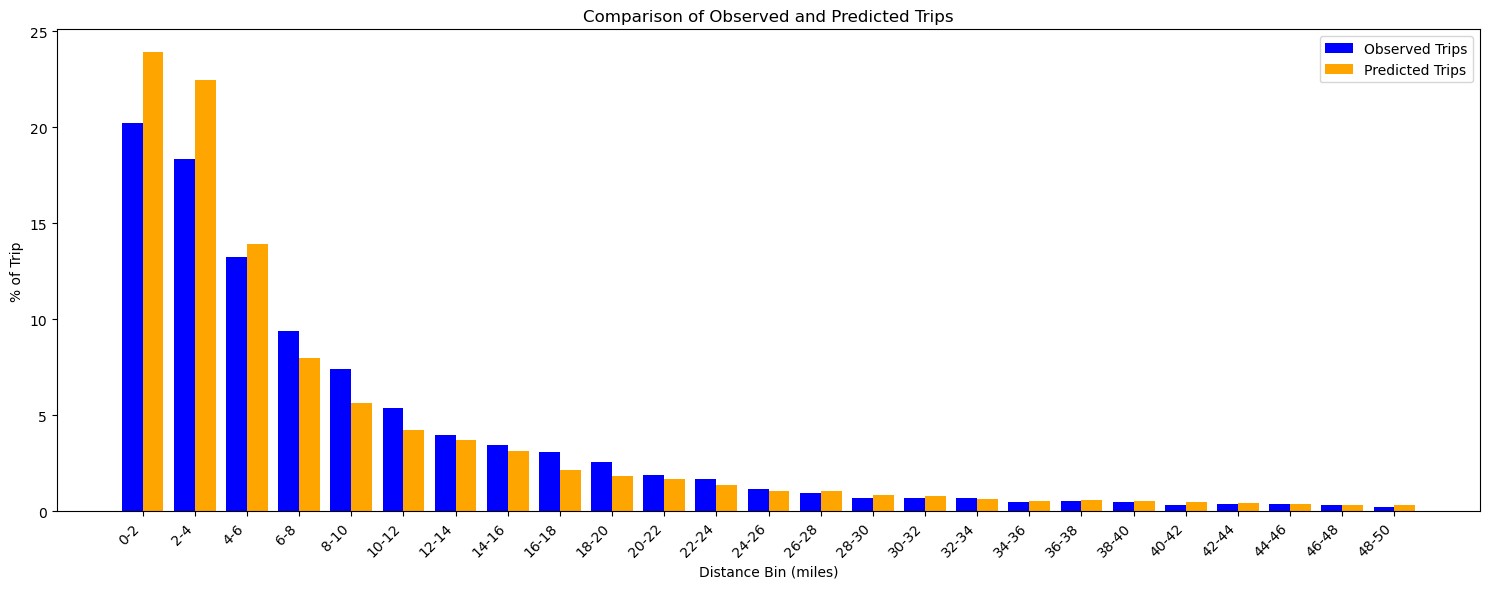

In [35]:
# Distance bins
distance_bins = [f"{i}-{i+2}" for i in range(0, 50, 2)]  # Generates bins from 0-2 to 88-90

# Adjust dataset selection based on the new number of bins
nhts_distance_bin = nhts_distance_bin.iloc[:len(distance_bins)]  
distance_df = distance_df.iloc[:len(distance_bins)]  

# Bar width
bar_width = 0.4
x = np.arange(len(distance_bins))  # X-axis positions

# Increase figure size
plt.figure(figsize=(15, 6))

# Plot histograms (bar plots)
plt.bar(x - bar_width/2, nhts_distance_bin['Visit Rate (%)'], width=bar_width, color='blue', label="Observed Trips")
plt.bar(x + bar_width/2, distance_df['Trip Rate (%)'], width=bar_width, color='orange', label="Predicted Trips")

# Labels and Title
plt.xlabel("Distance Bin (miles)")
plt.ylabel("% of Trip")
plt.title("Comparison of Observed and Predicted Trips")

# X-axis ticks
plt.xticks(x, distance_bins, rotation=45, ha="right")  # Rotate labels for better readability

# Adjust layout
plt.tight_layout()

# Legend
plt.legend()

# Show plot
plt.show()


## Desire Line Map (Distance)

In [32]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

In [33]:
# Load OD Matrix data
od_matrix = pd.read_csv('Distance_OD_matrix.csv', index_col=0)

# Convert the square matrix into a long format dataframe
od_long = od_matrix.stack().reset_index()
od_long.columns = ["origin_geo_id", "dest_geo_id", "flow_count"]

In [34]:
# Convert dataset to have same data type
od_long['origin_geo_id'] = od_long['origin_geo_id'].astype(str)
od_long['dest_geo_id'] = od_long['dest_geo_id'].astype(str)
gdf_shp['GEOID'] = gdf_shp['GEOID'].astype(str)

In [35]:
# Optimize Data Types (Reduce Memory)
def optimize_dataframe(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='float')
    return df

od_long = optimize_dataframe(od_long)

In [36]:
# Merge with Geometry Data (Get origin & destination shapes)
od_long = od_long.merge(
    gdf_shp[['GEOID', 'geometry']], 
    left_on="origin_geo_id", right_on="GEOID", how="left"
).rename(columns={"geometry": "origin_geometry"})

od_long = od_long.merge(
    gdf_shp[['GEOID', 'geometry']], 
    left_on="dest_geo_id", right_on="GEOID", how="left"
).rename(columns={"geometry": "dest_geometry"})

In [37]:
od_long = od_long.rename(columns={'GEOID_x': 'GEOID'})

In [39]:
# Create Desire Line Geometries
od_long["desire_line"] = od_long.apply(
    lambda row: LineString([row["origin_geometry"].centroid, row["dest_geometry"].centroid]), axis=1)

In [40]:
# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(od_long, geometry="desire_line", crs="EPSG:4326")

In [41]:
# Normalize Flow Count for Line Width Scaling
gdf["line_width"] = gdf["flow_count"] / gdf["flow_count"].max() * 2  # Scale between 0 and 2

In [42]:
gdf

,origin_geo_id,dest_geo_id,flow_count,GEOID,origin_geometry,GEOID_y,dest_geometry,desire_line,line_width
0,21001970100,21001970100,0.000000,21001970100,"POLYGON ((-85.29439 37.2456, -85.294 37.24575,...",21001970100,"POLYGON ((-85.29439 37.2456, -85.294 37.24575,...","LINESTRING (-85.16241 37.23834, -85.16241 37.2...",0.000000
1,21001970100,21001970200,0.978029,21001970100,"POLYGON ((-85.29439 37.2456, -85.294 37.24575,...",21001970200,"POLYGON ((-85.44604 37.1405, -85.44596 37.1405...","LINESTRING (-85.16241 37.23834, -85.32522 37.1...",0.003584
2,21001970100,21001970300,0.166496,21001970100,"POLYGON ((-85.29439 37.2456, -85.294 37.24575,...",21001970300,"POLYGON ((-85.26315 37.16273, -85.26297 37.162...","LINESTRING (-85.16241 37.23834, -85.15833 37.1...",0.000610
3,21001970100,21001970401,4.569502,21001970100,"POLYGON ((-85.29439 37.2456, -85.294 37.24575,...",21001970401,"POLYGON ((-85.3935 37.11923, -85.39158 37.1196...","LINESTRING (-85.16241 37.23834, -85.32473 37.0...",0.016747
4,21001970100,21001970402,9.484879,21001970100,"POLYGON ((-85.29439 37.2456, -85.294 37.24575,...",21001970402,"POLYGON ((-85.32804 37.12253, -85.32802 37.122...","LINESTRING (-85.16241 37.23834, -85.26799 37.1...",0.034761
...,...,...,...,...,...,...,...,...,...
1243219,21239050400,21239050106,0.645917,21239050400,"POLYGON ((-84.80435 38.16484, -84.78934 38.170...",21239050106,"POLYGON ((-84.73063 38.05037, -84.73062 38.050...","LINESTRING (-84.7036 38.15143, -84.68759 38.02...",0.002367
1243220,21239050400,21239050107,0.669760,21239050400,"POLYGON ((-84.80435 38.16484, -84.78934 38.170...",21239050107,"POLYGON ((-84.72188 38.04831, -84.72169 38.048...","LINESTRING (-84.7036 38.15143, -84.68318 38.04...",0.002455
1243221,21239050400,21239050200,0.072750,21239050400,"POLYGON ((-84.80435 38.16484, -84.78934 38.170...",21239050200,"POLYGON ((-84.84681 38.04097, -84.84644 38.041...","LINESTRING (-84.7036 38.15143, -84.74719 37.95...",0.000267
1243222,21239050400,21239050300,0.073044,21239050400,"POLYGON ((-84.80435 38.16484, -84.78934 38.170...",21239050300,"POLYGON ((-84.866 38.13463, -84.86574 38.13599...","LINESTRING (-84.7036 38.15143, -84.76495 38.10...",0.000268


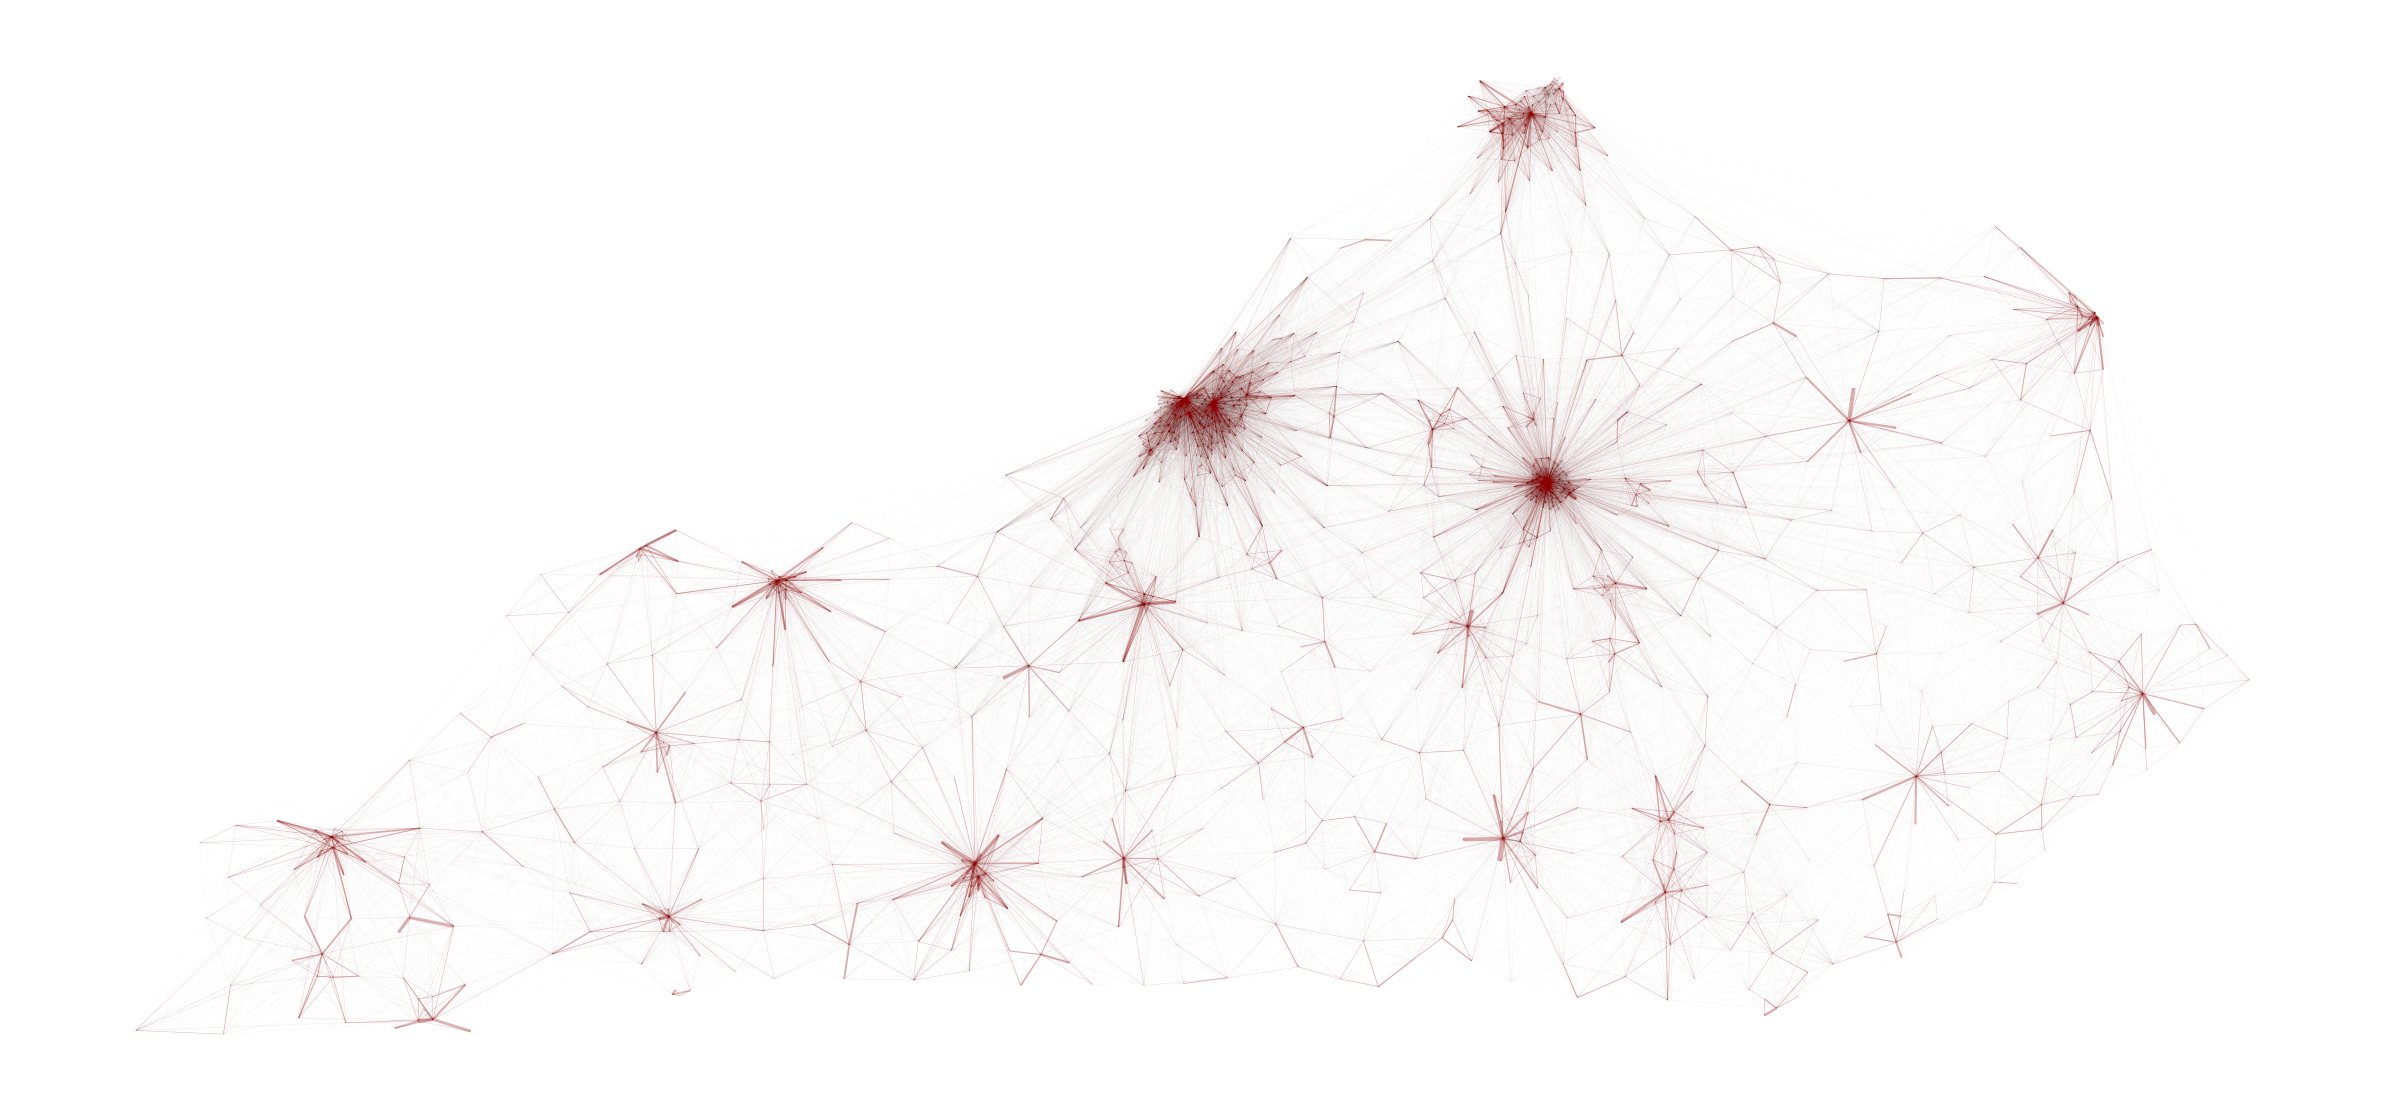

In [43]:
# Plot Static Desire Line Map
fig, ax = plt.subplots(figsize=(10, 14), dpi=300)
ax.set_facecolor("white")  # White background
ax.axis("off")  # Remove axis labels

# Plot Desire Lines
gdf.plot(ax=ax, color="darkred", alpha=0.3, linewidth=gdf["line_width"])

# Save & Show Map
plt.savefig("desire_line_map.png", bbox_inches="tight", dpi=300)
plt.show()